# Re-introduction to Linear Algebra

One of the prerequisites for this course is _linear algebra_. This notebook is designed to "re-introduce" you to the topic. It guides you through some fundamental concepts using (Python) code and code-generated pictures. So, beyond reviewing math we hope it gives you yet-another opportunity to improve your Python code-reading skills.

This notebook contains a mix of pencil-and-paper exercises as well as coding "exercises." But for the coding exercises, we have provided solutions. You should read them to see that they make sense, and you might even try erasing them and seeing if you can generate the same (or similar) solutions on your own.

> _Aside._ You may be wondering why you need a linear algebra refresher at all. The answer is that linear algebra is, arguably, **the** mathematical and computational foundation for much of modern data analysis and machine learning. Modern computers are also very good at executing linear algebra operations quickly. Therefore, the more of a computation you can cast into a linear algebraic form, the easier it will be to speed up and scale up later on.
>
> In fact, there are many computations that do not even look like linear algebra at first, but can, in fact, be cast into "patterns" that do resemble it. These include database queries and searches in graphs and networks. Some of these ideas appear in Topic 2. Therefore, knowing linear algebra and knowing how it maps to code gives you a framework for doing fast computations more generally. So, even if the topic seems a bit dry at first glance, try to stick with it and you'll earn dividends in the long-run, well beyond this topic and course.

## Additional resources...

If you need more reminders and examples of some of these ideas, we **highly recommend** the PDF notes from the edX course, Linear Algebra: Foundations to Frontiers ("LAFF"), which are available at http://ulaff.net/. It has many examples and explanations, which have borrowed liberally here. You might also enjoy watching [3blue1brown videos](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab), which emphasize conceptual intuition, or [Lorena Barba's _Land on Vector Spaces_ tutorial](https://www.youtube.com/watch?v=4-P0gptDT40), a 3-hour hands-on session in Python, or reading [Jason Brownlee's _Basics of Linear Algebra for Machine Learning_](https://www.mobt3ath.com/uplode/book/book-33342.pdf). (However, the Barba video and Brownlee book both assume you are comfortable enough in Python to start using Numpy right away, so it may or may not work for you.) Lastly, you might find Dan Margalit's [Interactive Linear Algebra](https://textbooks.math.gatech.edu/ila/) textbook, the one we use at Georgia Tech at the undergraduate level, a good reference.

$
\newcommand{\func}[2]{{#1}\left({#2}\right)}
\newcommand{\vecany}[1]{\left[\begin{matrix} #1 \end{matrix}\right]}
\newcommand{\vectwo}[2]{\vecany{{#1} \\ {#2}}}
\newcommand{\vecthree}[3]{\vecany{{#1} \\ {#2} \\ {#3}}}
\newcommand{\vecilong}[3]{\vecany{{#1} \\ \vdots \\ {#2} \\ \vdots \\ {#3}}}
$

## Setup for plots (run but mostly ignore)

The visualizations in this notebook require a bit of setup code. You don't need to understand this code right now, but as your Python skills evolve, trying to understand how this code works will be good practice.

In [1]:
# Just for reference, this prints the currently version of Python
import sys
print(sys.version)

3.6.4 (default, Feb  9 2018, 18:50:54) 
[GCC 5.4.1 20160904]


In [2]:
# Code for pretty-printing math notation
from IPython.display import display, Math, Latex, Markdown

def display_math(str_latex):
    display(Markdown('${}$'.format(str_latex)))
    
# Demo:
display_math(r'x \in \mathcal{S} \implies y \in \mathcal{T}')

$x \in \mathcal{S} \implies y \in \mathcal{T}$

In [3]:
# Code for drawing diagrams involving vectors
import matplotlib.pyplot as plt
%matplotlib inline

DEF_FIGLEN = 4
DEF_FIGSIZE = (DEF_FIGLEN, DEF_FIGLEN)

def figure(figsize=DEF_FIGSIZE):
    return plt.figure(figsize=figsize)

def multiplot_figsize(plot_dims, base_figsize=DEF_FIGSIZE):
    return tuple([p*x for p, x in zip(plot_dims, base_figsize)])

def subplots(plot_dims, base_figsize=DEF_FIGSIZE, sharex='col', sharey='row', **kw_args):
    assert len(plot_dims) == 2, "Must define a 2-D plot grid."
    multiplot_size = multiplot_figsize(plot_dims, base_figsize)
    _, axes = plt.subplots(plot_dims[0], plot_dims[1],
                           figsize=multiplot_size[::-1],
                           sharex=sharex, sharey=sharey,
                           **kw_args)
    return axes

def new_blank_plot(ax=None, xlim=(-5, 5), ylim=(-5, 5), axis_color='gray', title=''):
    if ax is None:
        ax = plt.gca()
    else:
        plt.sca(ax)
    ax.axis('equal')
    if xlim is not None: ax.set_xlim(xlim[0], xlim[1])
    if ylim is not None: ax.set_ylim(ylim[0], ylim[1])
    if axis_color is not None:
        ax.axhline(color=axis_color)
        ax.axvline(color=axis_color)
    if title is not None:
        ax.set_title(title)
    return ax

def draw_point2d(p, ax=None, marker='o', markersize=5, **kw_args):
    assert len(p) == 2, "Point must be 2-D."
    if ax is None: ax = plt.gca()
    ax.plot(p[0], p[1], marker=marker, markersize=markersize,
            **kw_args);

def draw_label2d(p, label, coords=False, ax=None, fontsize=14,
                 dp=(0.0, 0.1), horizontalalignment='center', verticalalignment='bottom',
                 **kw_args):
    assert len(p) == 2, "Position must be 2-D."
    if ax is None: ax = plt.gca()
    text = '{}'.format(label)
    if coords:
        text += ' = ({}, {})'.format(p[0], p[1])
    ax.text(p[0]+dp[0], p[1]+dp[1], text,
            fontsize=fontsize,
            horizontalalignment=horizontalalignment,
            verticalalignment=verticalalignment,
            **kw_args)

def draw_line2d(start, end, ax=None, width=1.0, color='black', alpha=1.0, **kw_args):
    assert len(start) == 2, "`start` must be a 2-D point."
    assert len(end) == 2, "`end` must be a 2-D point."
    if ax is None:
        ax = plt.gca()
    x = [start[0], end[0]]
    y = [start[1], end[1]]
    ax.plot(x, y, linewidth=width, color=color, alpha=alpha, **kw_args);

def draw_vector2d(v, ax=None, origin=(0, 0), width=0.15, color='black', alpha=1.0,
                  **kw_args):
    assert len(v) == 2, "Input vector must be two-dimensional."
    if ax is None:
        ax = plt.gca()
    ax.arrow(origin[0], origin[1], v[0], v[1],
             width=width,
             facecolor=color,
             edgecolor='white',
             alpha=alpha,
             length_includes_head=True,
             **kw_args);
    
def draw_vector2d_components(v, y_offset_sign=1, vis_offset=0.05, comp_width=1.5, **kw_args):
    assert len(v) == 2, "Vector `v` must be 2-D."
    y_offset = y_offset_sign * vis_offset
    draw_line2d((0, y_offset), (v[0], y_offset), width=comp_width, **kw_args)
    draw_line2d((v[0], y_offset), v, width=comp_width, **kw_args)
    
def draw_angle(theta_start, theta_end, radius=1, center=(0, 0), ax=None, **kw_args):
    from matplotlib.patches import Arc
    if ax is None: ax = plt.gca()
    arc = Arc(center, center[0]+2*radius, center[1]+2*radius,
              theta1=theta_start, theta2=theta_end,
              **kw_args)
    ax.add_patch(arc)
            
def draw_angle_label(theta_start, theta_end, label=None, radius=1, center=(0, 0), ax=None, **kw_args):
    from math import cos, sin, pi
    if ax is None: ax = plt.gca()
    if label is not None:
        theta_label = (theta_start + theta_end) / 2 / 360 * 2.0 * pi
        p = (center[0] + radius*cos(theta_label),
             center[1] + radius*sin(theta_label))
        ax.text(p[0], p[1], label, **kw_args)

print("Ready!")

Ready!


## Points in Euclidean geometry

First, recall the notion of _$d$-dimensional space_ that obeys Euclidean geometry. The space is an infinite set of points whose positions may be described in terms of $d$ coordinate axes, which are perpendicular to one another. Each axis is associated with real-values that range from $-\infty$ to $\infty$. Here is a snapshot of a $d=2$-dimensional space with the usual x- and y-axes intersecting at the origin, $x=0, y=0$.

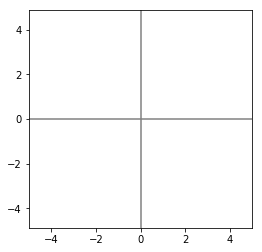

In [4]:
figure()
new_blank_plot();

We will refer to these "standard" perpendicular axes as the _canonical axes_ of a $d$-dimensional space.

The position of each point $p$ in this space is a tuple of $d$ real-valued coordinates, $p=(p_0, p_1, \ldots, p_{d-1})$. Each coordinate $p_i$ is a real number, which in math terms we write by saying $p_i \in \mathbb{R}$, where $\mathbb{R}$ is the set of real numbers. Each $p_i$ measures the extent of $p$ along the $i$-th axis. In 2-D, the x-coordinate of $p$ is $p_0$ and the y-coordinate is $p_1$.

> _Note._ We are using a convention in which the axes and coordinates are numbered starting at 0, in part for consistency with how Python numbers the elements of its tuples, lists, and other collections.

Here is an example of three points, $a$, $b$, and $c$, in a 2-D Euclidean space. The code uses the natural data type for representing the points, namely, Python's built-in 2-tuple (i.e., pair) data type.

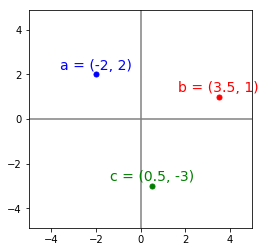

In [5]:
# Define three points
a = (-2, 2)
b = (3.5, 1)
c = (0.5, -3)

# Draw a figure containing these points
figure()
new_blank_plot()
draw_point2d(a, color='blue'); draw_label2d(a, 'a', color='blue', coords=True)
draw_point2d(b, color='red'); draw_label2d(b, 'b', color='red', coords=True)
draw_point2d(c, color='green'); draw_label2d(c, 'c', color='green', coords=True)

**Exercise.** We will assume you are familiar with the basic geometry of Euclidean spaces. For example, suppose you connect the points into a triangle whose sides are $\overline{ab}$, $\overline{bc}$, and $\overline{ac}$. What are the lengths of the triangle's sides? What are its angles?

## Vectors (vs. points)

In linear algebra, the first concept you need is that of a _vector_. A vector will look like a point but is, technically, a little bit different.

**Definition: vectors.** A $d$-dimensional vector is an "arrow" in $d$-dimensional space. It has a _length_ and a _direction_. It does *not* have a position! Having said that, we will represent a vector by its length along each of the canonical axes, albeit using the following slightly different notation.

In particular, we will write a $d$-dimensional vector $v$ as a _column vector_,

$$v \equiv \left[\begin{matrix} v_0 \\ v_1 \\ \vdots \\ v_{d-1} \end{matrix}\right],$$

where each entry $v_i$ is the length of the vector with respect to the $i$-th axis. We will also refer to the entries as _elements_ or _components_ of $v$.

In our class, we are always interested in spaces in which the possible values of $v_i$ are real numbers. Therefore, when we want to say a mathematical object $v$ is a $d$-dimensional vector, we will sometimes write that using the shorthand, $v \in \mathbb{R}^d$, meaning $v$ is an element of the set of all possible $d$-dimensional vectors with real-valued components.

> _Aside 0._ We usually use the term "coordinates" when referring to the components of a point. And while a vector does not have a position, making it not a point, we will nevertheless "abuse" terminology sometimes and refer to the "coordinates" of a vector when we mean "components" or "elements."
>
> _Aside 1._ The term "column" suggests there is a notion of a "row" vector. We'll discuss that later.

Before discussing this representation of "length" and "direction" further, let's encode it in Python.

**A code representation.** As we did with points, let's again use tuples to represent the elements of a vector. Below, we define a Python function, `vector()`, whose arguments are, say, $d$ coordinates; it returns a tuple that holds these elements. In this $d=2$ example, suppose a vector $v$ has a length of $v_0=1.0$ along the $0$-th coordinate (e.g., x-axis) and $v_1=2.0$ in the $1$st coordinate (e.g., y-axis):

In [6]:
def vector(*elems, dim=None):
    """Exercise: What does this function do?"""
    if dim is not None:
        if len(elems) > 0:
            assert dim == len(elems), "Number of supplied elements differs from the requested dimension."
        else: # No supplied elements
            elems = [0.0] * dim
    return tuple(elems)

def dim(v):
    """Returns the dimensionality of the vector `v`"""
    return len(v)

v = vector(1.0, 2.0)
d = dim(v)
print('v = {}    <==  {}-dimensional'.format(v, d))

v = (1.0, 2.0)    <==  2-dimensional


In [7]:
# Another example: Creates a zero-vector of dimension 3
z3 = vector(dim=3)
print('z3 = {}    <== {}-dimensional'.format(z3, dim(z3)))

z3 = (0.0, 0.0, 0.0)    <== 3-dimensional


**Aside: Pretty-printing using LaTeX.** Recall the abstract mathematical notation of a vector's elements as a vertical stack. Using the standard Python `print()` renders a vector as a row-oriented tuple. However, [Jupyter notebooks also support LaTeX notation ](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html) for rendering mathematical formulas in a "pretty" way. This feature means we can write Python code that generates LaTeX and renders it in the notebook!

You don't need to understand too much about how this process works. However, we mention it because you will see us define helper functions to help pretty-print math throughout this notebook.

In [8]:
def latex_vector(v, transpose=False):
    """Returns a LaTeX string representation of a vector"""
    s = r'''\left[ \begin{matrix} '''
    sep = r'''\\''' if not transpose else r''', &'''
    s += (r' {} ').format(sep).join([str(vi) for vi in v])
    s += r''' \end{matrix}\right]'''
    return s

# Demo: Pretty-print `v` from before
print("Standard Python output:", v)
print("\n'Mathy' output:")
v_latex = latex_vector(v)
display_math('v \equiv ' + v_latex)

Standard Python output: (1.0, 2.0)

'Mathy' output:


$v \equiv \left[ \begin{matrix} 1.0 \\ 2.0 \end{matrix}\right]$

Okay, back to math...

**Definition: direction of the vector.** To determine a vector's direction, start at the origin, and then take a step of size $v_i$ along each axis $i$. We say the vector points from the origin toward the ending point. That's its direction. We'll draw a picture momentarily to make this clearer.

**Definition: length of a vector.** The length of the vector is the straight-line (Euclidean) distance between the origin and the endpoint, if the vector is placed at the origin. With respect to the coordinates, this distance is given by the familiar formula,

$$\sqrt{v_0^2 + v_1^2 + \cdots + v_{d-1}^2},$$

that is, the square-root of the sum of squared lengths along each axis.

Here is a Python function to return this length.

In [9]:
def length(v):
    from math import sqrt
    return sqrt(sum([vi*vi for vi in v]))

print("The length of v = {} is about {}.".format(v, length(v)))

The length of v = (1.0, 2.0) is about 2.23606797749979.


**Pictures!** Before things get too abstract, let's give the idea of a vector a visual footing.

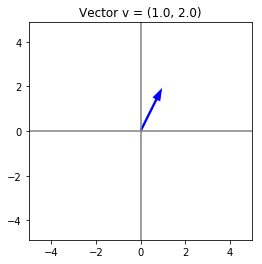

In [10]:
figure()
new_blank_plot(title='Vector v = {}'.format(str(v)))
draw_vector2d(v, color='blue')

**Remember: Vectors do not have a position!** In the picture above, we drew the vector beginning at the origin. However, remember that a vector technically does not have a position. That is, if we do "move" it to some other point of the space, it is the _same_ vector. So in the following picture, the blue vectors have the same representation, that is, identical components.

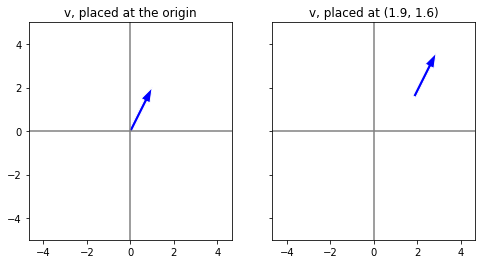

In [11]:
def random_vector(dim=2, v_min=-1, v_max=1):
    """Returns a random vector whose components lie in (`v_min`, `v_max`)."""
    from random import uniform
    v = vector(*[uniform(v_min, v_max) for _ in range(dim)])
    return v

def flip_signs_randomly(v):
    from random import choice
    return [choice([-1, 1])*vi for vi in v]

# Draw `v` at the origin
subfigs = subplots((1, 2))
new_blank_plot(subfigs[0], title='v, placed at the origin')
draw_vector2d(v, color='blue')

# Draw `v` somewhere else
dv = flip_signs_randomly(random_vector(dim=dim(v), v_min=1, v_max=3))
new_blank_plot(subfigs[1], title='v, placed at ({:.1f}, {:.1f})'.format(dv[0], dv[1]))
draw_vector2d(v, color='blue', origin=dv)

**Definition: $p$-norms.** We defined the length using the familiar Euclidean notion of distance. However, there are actually many other kinds of distance. The $p$-norm of a vector $v$ is one such generalized idea of a distance:

$$\|v\|_p \equiv \left( \sum_{i=0}^{d-1} |v_i|^p \right)^\frac{1}{p}.$$

The usual Euclidean distance is the same as $p=2$, i.e., the "two-norm." There are some other commonly used norms.

* $p=1$: The one-norm, which is the same as the "Manhattan distance." In machine learning applications, judicious use of this norm often leads to "sparse" models, that is, models where less important parameters are automatically driven to zero.
* $p=\infty$: The infinity-norm, also known as the "max norm." It is the largest absolute entry, that is, $\|v\|_\infty = \max_{i} \|v_i\|$.

Here is some code that implements the calculation of a norm.

In [12]:
def norm(v, p=2):
    assert p > 0
    from math import sqrt, inf, pow
    if p == 1: return sum([abs(vi) for vi in v])
    if p == 2: return sqrt(sum([vi*vi for vi in v]))
    if p == inf: return max([abs(vi) for vi in v])
    return pow(sum([pow(abs(vi), p) for vi in v]), 1.0/p)

def latex_norm(x, p=2):
    from math import inf
    if p == inf: p = r'\infty'
    s = r'\left\| '
    s += x
    s += r' \right\|_{}'.format(p)
    return s

import math
for p in [1, 2, math.inf]:
    v_pnorm_latex = latex_norm(v_latex, p)
    display_math(r'{} \approx {}'.format(v_pnorm_latex, norm(v, p)))

$\left\| \left[ \begin{matrix} 1.0 \\ 2.0 \end{matrix}\right] \right\|_1 \approx 3.0$

$\left\| \left[ \begin{matrix} 1.0 \\ 2.0 \end{matrix}\right] \right\|_2 \approx 2.23606797749979$

$\left\| \left[ \begin{matrix} 1.0 \\ 2.0 \end{matrix}\right] \right\|_\infty \approx 2.0$

**Exercise.** Convince yourself that the 1-norm, 2-norm, and $\infty$-norm satisfy the following properties.

- _Triangle inequality._ $\|v + w\| \leq \|v\| + \|w\|$.
- _Absolute homogeneity._ Let $\sigma$ be a scalar value. Then $\|\sigma v\| = |\sigma| \cdot \|v\|.$

**Comparing norms.** In the previous example, the one-norm is the largest value and the infinity-norm is the smallest. In fact, this holds in general and it is possible to show the following:

$$\|v\|_\infty \leq \|v\|_2 \leq \|v\|_1 \leq \sqrt{d} \|v\|_2 \leq d \|v\|_\infty.$$

Feel free either to prove it, or check it experimentally by running the following code. (Can you read the code and tell what it does?)

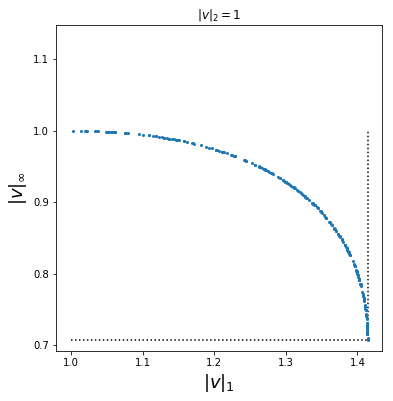

In [13]:
from math import inf, sqrt

def normalize_vector(v, p=2):
    """Returns a rescaled version of the input vector `v`."""
    v_norm = norm(v, p=p)
    return vector(*[vi/v_norm for vi in v])

# Generate random points whose 2-norm equals 1. Then
# compute the 1-norm and inf-norm of these points.
norms_1 = [None] * 250
norms_inf = [None] * 250
for k in range(len(norms_1)):
    v = normalize_vector(random_vector())
    norms_1[k] = norm(v, p=1)
    norms_inf[k] = norm(v, p=inf)
    
figure(figsize=(6, 6))
new_blank_plot(xlim=None, ylim=None, axis_color=None, title='$\|v\|_2 = 1$')
plt.plot(norms_1, norms_inf, marker='o', markersize=2, linestyle='none')
plt.xlabel('$\|v\|_1$', fontsize=18);
plt.ylabel('$\|v\|_\infty$', fontsize=18);
plt.hlines(y=1/sqrt(2), xmin=1, xmax=sqrt(2), linestyle=':')
plt.vlines(x=sqrt(2), ymin=1/sqrt(2), ymax=1, linestyle=':')
plt.axis('square');

**Exercise.** Consider _all_ the 2-D vectors whose $p$-norm equals 1. Place all the vectors at the origin, and imagine their endpoints. What shapes do the endpoints sketch out, for $p=1$, $p=2$, and $p=\infty$?

> _Hint._ Start by considering all the 2-D points whose two-norm, or Euclidean distance, equals 1. Convince yourself that their endpoints from the origin would all lie on a circle of radius 1. What shapes will $p=1$ and $p=\infty$ sketch out?

When you have an answer, check it by running the code below. It performs an experiment where, for each value of $p \in \{1, 2, \infty\}$, it generates a random point $v$, normalizes the coordinates of the point by $\|v\|_p$ so that $v / \|v\|_p = 1$, and then plots the result.

Points whose 1-norm equals 1 are shown in blue.
Points whose 2-norm equals 1 are shown in green.
Points whose inf-norm equals 1 are shown in red.


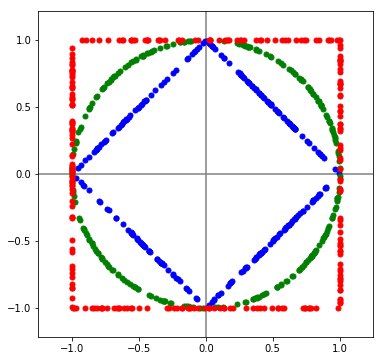

In [14]:
from math import inf

figure(figsize=(6, 6))
new_blank_plot(xlim=(-1.25, 1.25), ylim=(-1.25, 1.25))

for p, color in zip([1, 2, inf], ['blue', 'green', 'red']):
    print("Points whose {}-norm equals 1 are shown in {}.".format(p, color))
    for _ in range(250):
        v = normalize_vector(random_vector(), p=p)
        # The `p`-norm of `v` is now equal to 1; plot `v`.
        draw_point2d(v, color=color)

You should see that the norms are identical for $\left[\begin{matrix} \pm 1.0 \\ 0 \end{matrix}\right]$ and $\left[\begin{matrix} 0 \\ \pm 1.0 \end{matrix}\right]$, and everywhere else, $\|v\|_1 < \|v\|_2 < \|v\|_\infty$. 

## Basic operations: scaling, addition, and subtraction

The most elementary operations on vectors involve changing their lengths ("scaling" them), adding them, and subtracting them.

Let's start with scaling.

**Operation: Scaling a vector.** Given a vector $v$, _scaling_ it by a scalar value $\sigma$ simply multiplies every element of the vector by $\alpha$.

$$\sigma v = \sigma \cdot \left[\begin{matrix} v_0 \\ v_1 \\ \vdots \\ v_{d-1} \end{matrix}\right] = \left[\begin{matrix} \sigma v_0 \\ \sigma v_1 \\ \vdots \\ \sigma v_{d-1} \end{matrix}\right].$$

Here is a picture of the scaling operation.

$(\sigma=0.75) \left[ \begin{matrix} 3.0 \\ 2.0 \end{matrix}\right] = \left[ \begin{matrix} 2.25 \\ 1.5 \end{matrix}\right]$

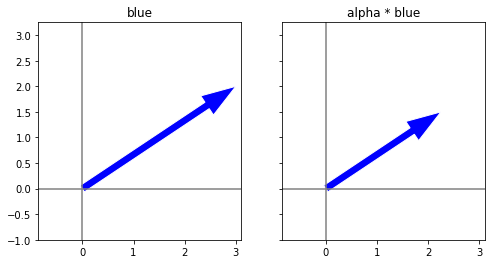

In [15]:
def scale(v, sigma):
    return tuple([sigma*vi for vi in v])

va = vector(3.0, 2.0)
sigma = 0.75
va_scaled = scale(va, sigma)

va_latex = latex_vector(va)
va_scaled_latex = latex_vector(va_scaled)
display_math(r'''(\sigma={}) {} = {}'''.format(sigma, va_latex, va_scaled_latex))

axes = subplots((1, 2))
new_blank_plot(axes[0], xlim=(-1, 3.25), ylim=(-1, 3.25), title='blue')
draw_vector2d(va, color='blue')

new_blank_plot(axes[1], xlim=(-1, 3.25), ylim=(-1, 3.25), title='alpha * blue')
draw_vector2d(va_scaled, color='blue')

**Operation: Vector addition.** Adding two vectors $v$ and $w$ consists of matching and summing component-by-component, also referred to as _elementwise addition_:

$$
v + w \equiv \left[\begin{matrix} v_0 \\ \vdots \\ v_{d-1} \end{matrix}\right] + \left[\begin{matrix} w_0 \\ \vdots \\ w_{d-1} \end{matrix}\right] = \left[\begin{matrix} v_0 + w_0 \\ \vdots \\ v_{d-1} + w_{d-1} \end{matrix}\right].
$$

Geometrically, the act of adding $v$ and $w$ is the same as connecting the end of $v$ to the start of $w$, as illustrated by the following code and picture.

In [16]:
def add(v, w):
    assert len(v) == len(w), "Vectors must have the same length."
    return tuple([vi+wi for vi, wi in zip(v, w)])

vb = vector(-1.5, 1.0)
vc = add(va, vb)

vb_latex = latex_vector(vb)
vc_latex = latex_vector(vc)
display_math('{} + {} = {}'.format(va_latex, vb_latex, vc_latex))

$\left[ \begin{matrix} 3.0 \\ 2.0 \end{matrix}\right] + \left[ \begin{matrix} -1.5 \\ 1.0 \end{matrix}\right] = \left[ \begin{matrix} 1.5 \\ 3.0 \end{matrix}\right]$

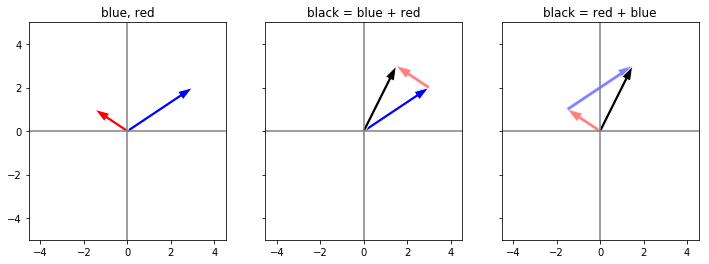

In [17]:
axes = subplots((1, 3))
new_blank_plot(ax=axes[0], title='blue, red');
draw_vector2d(va, color='blue')
draw_vector2d(vb, color='red')

new_blank_plot(ax=axes[1], title='black = blue + red');
draw_vector2d(va, color='blue')
draw_vector2d(vb, origin=va, color='red', alpha=0.5)
draw_vector2d(vc)

new_blank_plot(ax=axes[2], title='black = red + blue');
draw_vector2d(vb, color='red', alpha=0.5)
draw_vector2d(va, origin=vb, color='blue', alpha=0.5)
draw_vector2d(vc)

In the picture above, there are two vectors, "blue" and "red" (left subplot). Adding the red vector to the blue vector ("blue + red") is geometrically equivalent to attaching the start of the red vector to the end of the blue vector (middle subplot). Moreover, since scalar addition is symmetric ($a + b = b + a$), so, too, is vector addition (right subplot).

> _Aside._ Observe that our visualizations "exploit" the fact that vectors only have lengths and directions, not positions, so that vector addition becomes a symmetric operation.

**Negation and subtraction.** Subtracting two vectors is also done elementwise. Alternatively, one may view $v - w$ as $v + (-w)$, that is, first scaling $w$ by -1 and then adding it to $v$, which is what the code below implements.

$\left[ \begin{matrix} 3.0 \\ 2.0 \end{matrix}\right] + \left[ \begin{matrix} 1.5 \\ -1.0 \end{matrix}\right] = \left[ \begin{matrix} 4.5 \\ 1.0 \end{matrix}\right]$

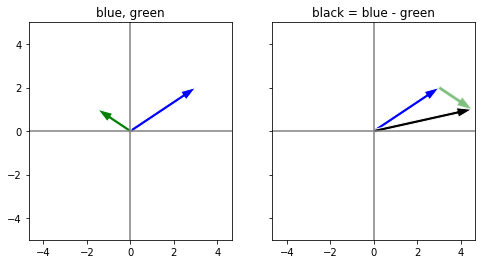

In [18]:
def neg(v):
    return tuple([-vi for vi in v])

def sub(v, w):
    return add(v, neg(w))

vd = sub(va, vb)

vb_neg_latex = latex_vector(neg(vb))
vd_latex = latex_vector(vd)
display_math('{} + {} = {}'.format(va_latex, vb_neg_latex, vd_latex))

axes = subplots((1, 2))
new_blank_plot(ax=axes[0], title='blue, green');
draw_vector2d(va, color='blue')
draw_vector2d(vb, color='green')

new_blank_plot(ax=axes[1], title='black = blue - green');
draw_vector2d(va, color='blue')
draw_vector2d(neg(vb), origin=va, color='green', alpha=0.5)
draw_vector2d(vd)

As the visualization indicates, scaling by -1 makes the vector point in the opposite direction. (See the green arrows.)

Lastly, observe that scaling and addition––e.g., $\sigma v + w$––combine as expected.

$0.75 \left[ \begin{matrix} 3.0 \\ 2.0 \end{matrix}\right] + \left[ \begin{matrix} -1.5 \\ 1.0 \end{matrix}\right] = \left[ \begin{matrix} 0.75 \\ 2.5 \end{matrix}\right]$

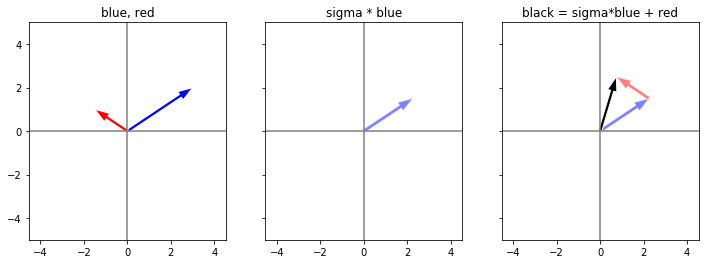

In [19]:
ve = add(va_scaled, vb)

ve_latex = latex_vector(ve)
display_math(r'''{} {} + {} = {}'''.format(sigma, va_latex, vb_latex, ve_latex))

axes = subplots((1, 3))
new_blank_plot(axes[0], title='blue, red')
draw_vector2d(va, color='blue')
draw_vector2d(vb, color='red')

new_blank_plot(axes[1], title='sigma * blue')
draw_vector2d(va_scaled, color='blue', alpha=0.5)

new_blank_plot(axes[2], title='black = sigma*blue + red')
draw_vector2d(va_scaled, color='blue', alpha=0.5)
draw_vector2d(vb, origin=va_scaled, color='red', alpha=0.5)
draw_vector2d(ve)

## Dot (or "inner") products

Another critically important operation on vectors is the _dot product_.

**Definition.** The _dot product_ (or _inner product_) between two $d$-dimensional vectors, $u$ and $w$, will be denoted by $\langle u, w \rangle$ and defined as follows:

$$\langle u, w \rangle \ \equiv \ u_0 w_0 + \cdots + u_{d-1} w_{d-1} \ = \  \sum_{i=0}^{d-1} u_i w_i \ .$$

That is, take $u$ and $w$, compute their elementwise products, and then sum these products.

**Observation.** The result of a dot product is a single number, i.e., a scalar.

Here is a Python implementation, followed by an example.

In [20]:
def dot(u, w):
    return sum([ui*wi for ui, wi in zip(u, w)])

In [21]:
u = (1, 2.5)
w = (3.25, 1.75)

display_math('u = ' + latex_vector(u))
display_math('w = ' + latex_vector(w))
u_dot_w_sum_long_latex = '+'.join([r'({}\cdot{})'.format(ui, wi) for ui, wi in zip(u, w)])
display_math(r'\langle u, w \rangle = ' + u_dot_w_sum_long_latex + ' = ' + str(dot(u, w)))

$u = \left[ \begin{matrix} 1 \\ 2.5 \end{matrix}\right]$

$w = \left[ \begin{matrix} 3.25 \\ 1.75 \end{matrix}\right]$

$\langle u, w \rangle = (1\cdot3.25)+(2.5\cdot1.75) = 7.625$

There is another commonly used notation for the dot product, which we will use extensively when working with matrices. It requires the concept of a _row vector_.

**Definition: row vectors and (vector) transposes.** Recall that we used the term _column_ with vectors and drew a vector as a vertical stack. As the very term "column" suggests, there is also a concept of a _row vector_. It will become important to distinguish between row and column vectors when we discuss matrices.

In this class, the convention we will try to use is that a vector is a column vector unless otherwise specified; and when we need a "row" version of $v$, we will use the operation called the _transpose_ to get it from the (column) version, denoted as

$$v^T \equiv \left[\begin{matrix} v_0, v_1, \ldots, v_{d-1} \end{matrix}\right].$$

In [22]:
display_math('v^T = ' + latex_vector(v, transpose=True))

$v^T = \left[ \begin{matrix} -1.0 , & 0.8228960420743343 \end{matrix}\right]$

**Notation: vector transpose form of the dot product.** Armed with the notions of both row and column vectors, here is an alternative way we will define a dot product:

$$\langle u, w \rangle \equiv u^T w \ \equiv \ [u_0, \ldots, u_{d-1}] \cdot \left[\begin{matrix} w_0 \\ \vdots \\ w_{d-1} \end{matrix}\right].$$

That is, given two (column) vectors $u$ and $w$, the dot product is the sum of the elementwise products between the transpose of $u$ and $w$. We read "$u^T w$" as "$u$-transpose times $w$."

In [23]:
u_dot_w_vec_latex = latex_vector(u, transpose=True) + r' \cdot ' + latex_vector(w)
display_math(r'\langle u, w \rangle = u^T w = ' + u_dot_w_vec_latex + ' = ' + u_dot_w_sum_long_latex + ' = ' + str(dot(u, w)))

$\langle u, w \rangle = u^T w = \left[ \begin{matrix} 1 , & 2.5 \end{matrix}\right] \cdot \left[ \begin{matrix} 3.25 \\ 1.75 \end{matrix}\right] = (1\cdot3.25)+(2.5\cdot1.75) = 7.625$

**Exercise.** Write some code to verify, using some examples, that $\langle u, u \rangle = u^T u = \|u\|_2^2$. In other words, the dot product of a vector with itself is the two-norm of that vector, squared.

In [24]:
# Write your code examples here

### A geometric interpretation of the dot product

Here is another important fact about the dot product that, later on, will help us interpret it.

**Fact.** $u^T w = \|u\|_2 \|w\|_2 \cos \theta$, where $\theta$ is the angle between $u$ and $w$.

To see this fact, look at the following diagram and answer the "Exercise" that follows it.

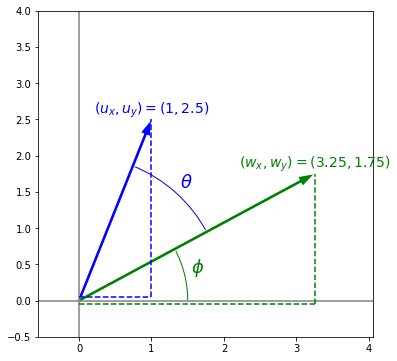

In [25]:
def radians_to_degrees(radians):
    from math import pi
    return radians * (180.0 / pi)

def get_angle_degrees(point):
    assert len(point) == 2, "Point must be 2-D."
    from math import pi, atan2
    return radians_to_degrees(atan2(point[1], point[0]))

figure((6, 6))
new_blank_plot(xlim=(-0.5, 4), ylim=(-0.5, 4));

draw_vector2d(u, color='blue', width=0.05)
plt.text(u[0], u[1], '$(u_x, u_y) = ({}, {})$'.format(u[0], u[1]), color='blue',
         horizontalalignment='center', verticalalignment='bottom', fontsize=14)
draw_vector2d(w, color='green', width=0.05)
plt.text(w[0], w[1], '$(w_x, w_y) = ({}, {})$'.format(w[0], w[1]), color='green',
         horizontalalignment='center', verticalalignment='bottom', fontsize=14)

draw_vector2d_components(u, y_offset_sign=1, color='blue', linestyle='dashed')
draw_vector2d_components(w, y_offset_sign=-1, color='green', linestyle='dashed')

phi_degrees = get_angle_degrees(w)
theta_degrees = get_angle_degrees(u) - phi_degrees
draw_angle(0, phi_degrees, radius=1.5, color='green')
draw_angle_label(0, phi_degrees, r'$\phi$', radius=1.6, color='green', fontsize=18)
draw_angle(phi_degrees, phi_degrees+theta_degrees, radius=2, color='blue')
draw_angle_label(phi_degrees, phi_degrees+theta_degrees, r'$\theta$', radius=2.1, color='blue', fontsize=18)

**Exercise.** Let $u = \left[\begin{matrix} u_x \\ u_y \end{matrix}\right]$ and $w = \left[\begin{matrix} w_x \\ w_y \end{matrix}\right]$. In the figure above, an example of a vector $u$ is shown as a blue line and $w$ as a green line. Let $\phi$ be the angle that $w$ makes with the x-axis, and let $\theta$ be the angle between $u$ and $w$. Using [trigonometric identities](https://en.wikipedia.org/wiki/List_of_trigonometric_identities#Angle_sum_and_difference_identities) from elementary geometry, prove that $u^T w = \|u\|_2 \|w\|_2 \cos \theta$.

> _Hint._ Here is one way to start: observe that, for instance, $w_y = \|w\|_2 \sin \phi$ and $u_x = \|u\|_2 \cos (\theta+\phi)$, and then apply one or more trigonometric identities as needed.

**Interpretation.** So what does the dot product mean? One can interpret it as a "strength of association" between the two vectors, similar to statistical correlation.

To see why, observe that the dot product accounts for both the lengths of the vectors and their relative orientation.

The vector lengths are captured by the product of their lengths ($\|u\|_2 \|w\|_2$). The longer the vectors are, the larger the product of their lengths, $\|u\|_2 \|w\|_2$. If you know only the lengths of the vectors, their dot product can never be larger than this product.

The relative orientation is captured by $\cos \theta$. That factor moderates the maximum possible value. In particular, if the two vectors point in exactly the same direction, meaning $\theta = 0$, then $\cos \theta = 1$ and the dot product is exactly the maximum, $\|u\|_2 \|w\|_2$. If instead the vectors point in opposite directions, meaning $\theta = \pi\ \mathrm{radians} = 180^{\circ}$, then $\cos \theta = -1$ and the dot product is $-\|u\|_2 \|w\|_2$. For any other values of $\theta$ between $0$ and $2 \pi\ \mathrm{radians}$ (or $360^{\circ}$), $|\cos \theta| < 1$ so that $|u^T w| < \|u\|_2 \|w\|_2$.

In the context of data analysis, the analogous measurement to $\cos \theta$ is the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient). Each vector would represent a regression line that goes through some sample of points, with $\cos \theta$ measuing the angle between the two regression lines. The diagram above gives you a geometric way to think about such correlations.

## Linear transformations

The basic operations we considered above take one or more vectors as input and _transform_ them in some way. In this part of the notebook, we examine what is arguably the most important general class of transformations, which are known as _linear transformations_. Before doing so, let's start with some auxiliary concepts.

**Definition: vector-valued functions** (also, _vector functions_). Let $f(v)$ be a function that takes as input any vector $v$ and returns another vector. Because $f$ returns a vector, we will sometimes refer to it as a _vector-valued function_ or just _vector function_ for short.

Note that the input and output vectors of $f$ need **not** have the same lengths!

**Example: $\mathrm{scale}_\alpha(v)$.** Scaling is a simple example of a vector function. If we name this function $\mathrm{scale}$ and parameterize it by the scaling coefficient $\alpha$, then we might write it down mathematically as

$$\mathrm{scale}_\alpha(v) \equiv \alpha v.$$

So,

$$\mathrm{scale}_{1.25}(v) = 1.25 \left[\begin{matrix} v_0 \\ \vdots \\ v_{d-1} \end{matrix}\right] = \left[\begin{matrix} 1.25 v_0 \\ \vdots \\ 1.25 v_{d-1} \end{matrix}\right].$$

The code implementation would look identical to the Python `scale()` we defined previously.

**Example: $\mathrm{avgpairs}(v)$.** Let $v$ be a vector whose length, $d$, is even. Here is a vector function that returns a new vector of half the number of components, where elements of the new vector are the averages of adjacent pairs of $v$:

$$\mathrm{avgpairs}(v) \equiv \left[\begin{matrix} \frac{1}{2}(v_0 + v_1) \\ \frac{1}{2}(v_2 + v_3) \\ \vdots \\ \frac{1}{2}(v_{d-2} + v_{d-1}) \end{matrix}\right].$$

**Exercise.** Write a Python function that implements $\mathrm{avgpairs}(v)$.

In [26]:
# Sample solution; how would you have done it?
def avgpairs(v):
    assert dim(v) % 2 == 0, "Input vector `v` must be of even dimension."
    v_pairs = zip(v[:-1:2], v[1::2])
    v_avg = [0.5*(ve + vo) for ve, vo in v_pairs]
    return vector(*v_avg)

v_pairs = vector(1, 2, 3, 4, 5, 6, 7, 8)
print(v_pairs, "=>", avgpairs(v_pairs))

(1, 2, 3, 4, 5, 6, 7, 8) => (1.5, 3.5, 5.5, 7.5)


**Definition: linear functions (or linear transformations).** A function $f(v)$ is a _linear transformation_ if it satisfies the following two properties:

1. $f(\sigma v) = \sigma f(v)$, where $\sigma$ is a scalar value.
2. $f(v + w) = f(v) + f(w)$.

The first property says that $f$ applied to a scaled vector is the same as first applying $f$ to the vector and scaling the result. The second property says that $f$ applied to the sum of two vectors is the same as first applying $f$ to the individual vectors and then adding the result.

When combined, these properties are equivalent to the more concise statement that $f(\sigma v + w) = \sigma f(v) + f(w)$.

**Exercise.** The function $\mathrm{scale}_\alpha(v)$ is a linear transformation––true or false?

> _Answer._ This statement is true:
>
> - Property 1: $\mathrm{scale}_\alpha(\sigma v) = \alpha (\sigma v) = \sigma (\alpha v) = \sigma \mathrm{scale}_\alpha(v).$
> - Property 2: $\mathrm{scale}_\alpha(v + w) = \alpha(v + w) = \alpha v + \alpha w = \mathrm{scale}_\alpha(v) + \mathrm{scale}_\alpha(w).$

To see this fact in action, run the following experiment (the next four code cells, ending just before the next exercise).

In [27]:
DEFAULT_ALPHA = 1.25
def scale_alpha(v, alpha=DEFAULT_ALPHA):
    return scale(v, alpha)

def latex_scale_alpha(x, alpha=DEFAULT_ALPHA):
    return r'\mathrm{{scale}}_{{{}}}\left( {} \right)'.format(alpha, x)

display_math(r'''{} \equiv {} \cdot {}'''.format(latex_scale_alpha('x'), DEFAULT_ALPHA, 'x'))

$\mathrm{scale}_{1.25}\left( x \right) \equiv 1.25 \cdot x$

$u_0 \equiv \mathrm{scale}_{1.25}\left( 0.75 \left[ \begin{matrix} 3.0 \\ 2.0 \end{matrix}\right] + \left[ \begin{matrix} -1.5 \\ 1.0 \end{matrix}\right] \right) = \mathrm{scale}_{1.25}\left( \left[ \begin{matrix} 0.75 \\ 2.5 \end{matrix}\right] \right) = \left[ \begin{matrix} 0.9375 \\ 3.125 \end{matrix}\right]$

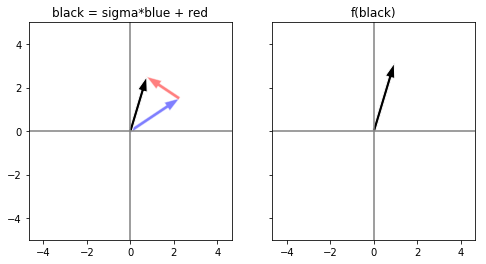

In [28]:
# Recall: In the previous code cells,
# - `va`, `vb`, and `sigma` are given;
# - `va_scaled = scale(va, sigma)`
# - `ve = add(va_scaled, vb)`

# Let `u0 = f(ve)` where, again, `ve = sigma*va + vb`
u0 = scale_alpha(ve)

u0_latex = latex_vector(u0)
arg_str = r'{} {} + {}'.format(sigma, va_latex, vb_latex)
lhs_str = latex_scale_alpha(arg_str)
arg2_str = ve_latex
mid_str = latex_scale_alpha(arg2_str)
rhs_str = u0_latex
display_math(r'u_0 \equiv {} = {} = {}'.format(lhs_str, mid_str, rhs_str))

axes = subplots((1, 2))
new_blank_plot(axes[0], title='black = sigma*blue + red')
draw_vector2d(va_scaled, color='blue', alpha=0.5)
draw_vector2d(vb, origin=va_scaled, color='red', alpha=0.5)
draw_vector2d(ve)

new_blank_plot(axes[1], title='f(black)')
draw_vector2d(scale_alpha(ve))

In [29]:
display_math(r'''\frac{{{}}}{{{}}} = {}'''.format(latex_norm(rhs_str),
                                                  latex_norm(arg_str),
                                                  norm(u0) / norm(ve)))

$\frac{\left\| \left[ \begin{matrix} 0.9375 \\ 3.125 \end{matrix}\right] \right\|_2}{\left\| 0.75 \left[ \begin{matrix} 3.0 \\ 2.0 \end{matrix}\right] + \left[ \begin{matrix} -1.5 \\ 1.0 \end{matrix}\right] \right\|_2} = 1.2499999999999998$

$u_1 \equiv 0.75 \cdot \mathrm{scale}_{1.25}\left( \left[ \begin{matrix} 3.0 \\ 2.0 \end{matrix}\right] \right) + \mathrm{scale}_{1.25}\left( \left[ \begin{matrix} -1.5 \\ 1.0 \end{matrix}\right] \right) = \left[ \begin{matrix} 0.9375 \\ 3.125 \end{matrix}\right]$

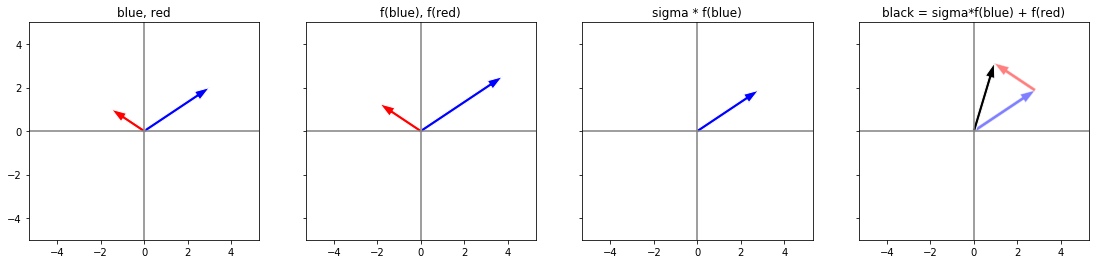

In [30]:
# sigma*f(va) + f(vb)
u1_a = scale_alpha(va)
u1_aa = scale(u1_a, sigma)
u1_b = scale_alpha(vb)
u1 = add(u1_aa, u1_b)

display_math(r'''u_1 \equiv {} \cdot {} + {} = {}'''.format(sigma,
                                                            latex_scale_alpha(va_latex),
                                                            latex_scale_alpha(vb_latex),
                                                            latex_vector(u1)))

_, axes = plt.subplots(1, 4, figsize=(19, 4), sharey='row')

new_blank_plot(axes[0], title='blue, red')
draw_vector2d(va, color='blue')
draw_vector2d(vb, color='red')

new_blank_plot(axes[1], title='f(blue), f(red)')
draw_vector2d(u1_a, color='blue')
draw_vector2d(u1_b, color='red')

new_blank_plot(axes[2], title='sigma * f(blue)')
draw_vector2d(u1_aa, color='blue')

new_blank_plot(axes[3], title='black = sigma*f(blue) + f(red)')
draw_vector2d(u1_aa, color='blue', alpha=0.5)
draw_vector2d(u1_b, origin=u1_aa, color='red', alpha=0.5)
draw_vector2d(u1)

**Exercise.** The function $\mathrm{avgpairs}(v)$ is a linear transformation––true or false?

**Exercise.** Let $\mathrm{norm}(v) \equiv \|v\|_1$. Is $\mathrm{norm}(v)$ a linear transformation?

**Exercise.** Let $\mathrm{offset}_\delta(v) \equiv v + \delta$, where $\delta$ is some scalar value (i.e., $\delta$ is a single number, not a vector). That is,

$$
\mathrm{offset}_\delta(v) \equiv \left[\begin{matrix} v_0 + \delta \\ v_1 + \delta \\ \vdots \\ v_{d-1} + \delta \end{matrix}\right].
$$

Is $\mathrm{offset}_\delta(v)$ a linear transformation?

**Exercise.** Suppose we are operating in a two-dimensional space. Let

$$\mathrm{rotate}_{\theta}(v) \equiv \vectwo{v_0 \cos \theta - v_1 \sin \theta}{v_0 \sin \theta + v_1 \cos \theta}.$$

Is $\mathrm{rotate}_{\theta}(v)$ a linear transformation?

While, after, or instead of pondering the answer for $\mathrm{rotate}_\theta$, here is some code to visualize its effects. (This code selects a rotation angle at random, so you run it repeatedly to see the effects under different angles.)

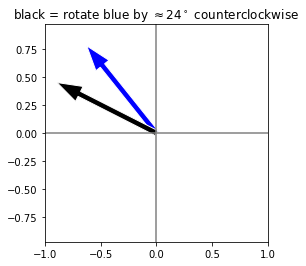

In [31]:
def random_angle(min_angle=0, max_angle=None):
    """
    Returns a random angle in the specified interval
    or (0, pi) if no interval is given.
    """
    from math import pi
    from random import uniform
    if max_angle is None: max_angle = pi
    return uniform(0, max_angle)

def rotate(v, theta=0):
    from math import cos, sin
    assert dim(v) == 2, "Input vector must be 2-D."
    return vector(v[0]*cos(theta) - v[1]*sin(theta),
                  v[0]*sin(theta) + v[1]*cos(theta))

v_rand = normalize_vector(random_vector())
theta_rand = random_angle()
w_rand = rotate(v_rand, theta_rand)

figure()
new_blank_plot(xlim=(-1, 1), ylim=(-1, 1),
               title=r'black = rotate blue by $\approx${:.0f}$^\circ$ counterclockwise'.format(radians_to_degrees(theta_rand)))
draw_vector2d(v_rand, color='blue', width=0.05)
draw_vector2d(w_rand, color='black', width=0.05)

## Linear transformations using matrices

If $f$ is a linear transformation, then $f(\alpha v + \beta w) = \alpha f(v) + \beta f(w)$. In fact, the reverse is _also_ true: if $f(\alpha v + \beta w) = \alpha f(v) + \beta f(w)$, then $f$ must be a linear transformation. Refer to the [LAFF notes](http://ulaff.net/) for a formal proof of this fact.

Here is one immediate consequence of this fact. Suppose you have $n$ vectors, named $v_0, v_1, \ldots, v_{n-1}$. Here, $v_i$ is the name of a vector, rather than an element of a vector; the components of $v_i$ would be $v_{0,i}, v_{1,i}, \ldots$. Let's also suppose you have $n$ scalars, named $\alpha_0, \alpha_1, \ldots, \alpha_{n-1}$. Then,

$$f(\alpha_0 v_0 + \alpha_1 v_1 + \cdots + \alpha_{n-1} v_{n-1})
  = \alpha_0 f(v_0) + \alpha_1 f(v_1) + \cdots + \alpha_{n-1} f(v_{n-1}).$$

This fact makes $f$ very special because it allows you to figure out the effect of $f$ if you are allowed to "sample" it on particular values, the $\{v_i\}$. For example, suppose $f(v)$ operates on two-dimensional vectors and returns two-dimensional vectors as a result.

**Exercise.** Let $f(v)$ be a linear transformation on two-dimensional vectors $v$. Suppose you are told that

$$
\begin{eqnarray}
  \func{f}{\vectwo{1}{0}} & = & \vectwo{3}{5} \\
  \func{f}{\vectwo{0}{1}} & = & \vectwo{-1}{2}.
\end{eqnarray}
$$
Determine $\func{f}{\vectwo{2}{-4}}$.

_Answer._ Start by observing that

$$
\vectwo{2}{-4} = 2 \vectwo{1}{0} - 4 \vectwo{0}{1}.
$$

Since $f$ is a linear transformation,

$$
\func{f}{\vectwo{2}{-4}}
= \func{f}{2 \vectwo{1}{0} - 4 \vectwo{0}{1}}
= 2 \func{f}{\vectwo{1}{0}} - 4 \func{f}{\vectwo{0}{1}}
= 2 \vectwo{3}{5} - 4 \vectwo{-1}{2}
= \vectwo{2 \cdot 3 - 4 \cdot (-1)}{2 \cdot 5 - 4 \cdot 2}
= \vectwo{10}{2}.
$$

**Canonical axis vectors.** In the preceding example, you were given samples of $f$ on two very special vectors, namely, a distinct set of perpendicular unit vectors having a "1" in just one component of the vector. Let's denote these special vectors by $e_j$ where, in a $d$-dimensional space,

$$
e_j \equiv \left[\begin{array}{cl}
             0 & \leftarrow 0\mbox{-th component} \\
             \vdots & \\
             0 \\
             1 & \leftarrow j\mbox{-th component}\\
             0 & \\
             \vdots & \\
             0 & \leftarrow (d-1)\mbox{-th component}
           \end{array}\right]
           $$
We'll refer to these as the _canonical axis vectors_.

> In the LAFF notes, these are called the _unit basis vectors_, which is more standard terminology in the linear algebra literature.

**Matrix representations.** Any vector may be written in terms of these canonical axis vectors.

$$
v
= \vecthree{v_0}{\vdots}{v_{d-1}}
= v_0 \vecthree{1}{\vdots}{0} + \cdots + v_{d-1} \vecthree{0}{\vdots}{1}
= v_0 e_0 + \cdots + v_{d-1} e_{d-1}
= \sum_{j=0}^{d-1} v_j e_j.
$$

Therefore, consider any linear transformation, $f$. If you are given samples of $f$ along all axes, $\{x_j \equiv f(e_j)\}$, then that is enough to calculate $f$ for any vector $v$:

$$
\func{f}{v}
= \func{f}{\sum_{j=0}^{d-1} v_j e_j}
= \sum_{j=0}^{d-1} v_j \func{f}{e_j}
= \sum_{j=0}^{d-1} v_j x_j.
$$

Let's suppose $v$ is $n$-dimensional. Therefore, there are $n$ canonical axis vectors. If the result of $f(v)$ is $m$-dimensional, then each of the $x_j$ vectors is also $m$ dimensional. Therefore, we can write each $x_j$ as

$$
x_j = \vecthree{x_{0,j}}{\vdots}{x_{m-1,j}}.
$$

A convenient way to represent the full collection of all $n$ of the $x_j$ vectors is in the form of a _matrix_, where each column corresponds to one of these $x_j$ vectors:

$$
X
= \left[\begin{matrix} x_0 & \cdots & x_{n-1} \end{matrix}\right]
= \left[\begin{matrix}
    x_{0,0}   & \cdots & x_{0,n-1} \\
    \vdots    & \ddots & \vdots \\
    x_{m-1,0} & \cdots & x_{m-1,n-1}
  \end{matrix}\right].
$$

**Aside: Specifying the dimensions of a matrix.** Similar to the way we "declare" a vector $v$ to have dimension $d$ by writing $v \in \mathbb{R}^d$, we have a similar notation to specify that a matrix has dimensions of, say, $m$-by-$n$: we write $X \in \mathbb{R}^{m \times n}$.

**Example.** Recall the previous example where

$$
  \func{f}{\vectwo{1}{0}} = \vectwo{3}{5} \quad \mbox{and} \quad \func{f}{\vectwo{0}{1}} = \vectwo{-1}{2}.
$$
What is the matrix $X$ that represents $f$?

_Answer._ We were given $f$ at the canonical axis vectors, which then become the columns of the corresponding matrix.

$$
X = \left[\begin{matrix} 3 & -1 \\ 5 & 2 \end{matrix}\right].
$$

**Exercise.** What is the matrix $X$ that represents $\mathrm{rotate}_\theta(v)$?

**A code representation.** In this course, you will see many ways of representing matrices and vectors. For the purpose of this notebook, let's store a matrix as a tuple of (column) vectors. Here is a Python function, `matrix(x0, x1, ...)`, where each argument is a column vector, that stores the columns in a tuple.

In [32]:
def matrix(*cols):
    if len(cols) > 2:
        a_cols = cols[:-1]
        b_cols = cols[1:]
        for k, (a, b) in enumerate(zip(a_cols, b_cols)):
            assert dim(a) == dim(b), \
                   "Columns {} and {} have different lengths ({} vs. {})".format(k, k+1, dim(a), dim(b))
    return tuple(cols)

def num_cols(X):
    return len(X)

def num_rows(X):
    return dim(X[0]) if num_cols(X) >= 1 else 0

# Demo
X = matrix(vector(3, 5), vector(-1, 2))
print("X =", X)

X = ((3, 5), (-1, 2))


Here is a snippet of code that will be useful for pretty-printing matrices.

In [33]:
def matelem(X, row, col):
    assert col < dim(X), "Column {} is invalid (matrix only has {} columns).".format(col, dim(X))
    x_j = X[col]
    assert row < dim(x_j), "Row {} is invalid (matrix only has {} rows).".format(row, dim(x_j))
    return x_j[row]

def latex_matrix(X):
    m, n = num_rows(X), num_cols(X)
    s = r'\left[\begin{matrix}'
    for i in range(m):
        if i > 0: s += r' \\' # New row
        for j in range(n):
            if j > 0: s += ' & '
            s += str(matelem(X, i, j))
    s += r' \end{matrix}\right]'
    return s

X_latex = latex_matrix(X)
display_math('X = ' + X_latex)

$X = \left[\begin{matrix}3 & -1 \\5 & 2 \end{matrix}\right]$

**Definition: matrix-vector product** (matrix-vector multiply). Let's define the _matrix-vector product_ (or _matrix-vector multiply_) as follows.

Given an $m$-by-$n$ matrix $X$ and a vector $v$ of length $n$, the _matrix-vector product_ is given by

$$
  X v
  = \left[\begin{matrix} x_0 & \cdots & x_{n-1} \end{matrix}\right] \vecthree{v_0}{\vdots}{v_{n-1}}
  = x_0 v_0 + \cdots + x_{n-1} v_{n-1}.
$$

With this notation, a linear transformation $f$ represented by $X$ may be written as $f(v) = X v$.

> We will sometimes write the matrix vector product with an explicit "dot" operator, $X \cdot v$. This usage is arbitrary and we will use it for aesthetic reasons only.

**Linear combination.** The action of a matrix-vector product is to use the entries of $v$ to scale the corresponding columns of $X$ followed by a sum of the resulting scaled vectors. We say that $X v$ is a _linear combination_ of the columns of $X$. The "coefficients" or "weights" of this linear combination are the elements of $v$.

**Example.** Continuing the example above, calculate $f([2, -4]^T)$ using $X$.

_Answer._ We can apply the matrix-vector product:

$$
  \left[\begin{matrix} 3 & -1 \\ 5 & 2 \end{matrix}\right] \vectwo{2}{-4}
  = 2 \vectwo{3}{5} - 4 \vectwo{-1}{2},
$$
which is the same result as before.

Here is a Python code implementation of the matrix-vector product. Take a moment to verify that you understand how it works.

In [34]:
def matvec(X, v):
    assert dim(X) == dim(v), "Matrix and vector have mismatching shapes."
    w = [0] * num_rows(X)
    for x_j, v_j in zip(X, v):
        w = add(w, scale(x_j, v_j))
    return w

v = vector(2, -4)
w = matvec(X, v)

v_latex = latex_vector(v)
w_latex = latex_vector(w)
display_math('X v = ' + X_latex + v_latex + ' = ' + w_latex)

$X v = \left[\begin{matrix}3 & -1 \\5 & 2 \end{matrix}\right]\left[ \begin{matrix} 2 \\ -4 \end{matrix}\right] = \left[ \begin{matrix} 10 \\ 2 \end{matrix}\right]$

**Exercise.** Another way to think about the action of a matrix-vector product is to imagine computing one entry of the output at a time. That is, let $w = Xv$. Write down a formula for $w_i$.

_Answer._ We want the $i$-th entry of $w = Xv$. Let's denote that by $w_i = (Xv)_i$. From the definition of matrix-vector product given above,

$$
w_i
  = (X v)_i
  = \left(x_0 v_0 + x_1 v_1 + \cdots + x_{n-1} v_{n-1}\right)_i,
$$

that is, the $i$-th entry of the right-hand side. So, we need to gather the $i$-th entry of every term on the right-hand side, e.g.,

$$
w_i
  = (X v)_i
  = \left(x_0 v_0 + x_1 v_1 + \cdots + x_{n-1} v_{n-1}\right)_i
  = x_{i,0} v_0 + x_{i,1} v_1 + \cdots + x_{i,n-1} v_{n-1},
  = \sum_{j=0}^{n-1} x_{i,j} v_j.
$$

In other words, the $i$-th entry of the output $w$ is the dot product between the $i$-th row of $X$ and $v$.

**Example: linear systems.** Matrix notation is also a convenient way to write down systems of linear equations. One setting in which we will see such systems is in linear regression.

Suppose you want to predict college GPA given a student's high school GPA and SAT score given observed data. Let $i$ be a student with college GPA $c_i$, high school GPA $h_i$, and SAT score $s_i$, and suppose there are $m$ students in total, numbered from 0 to $m-1$. As an initial guess, you might hypothesize a linear relationship among these variables, e.g., $c_i \approx \theta_0 h_i + \theta_1 s_i + \theta_2$, where $\theta_0$, $\theta_1$, and $\theta_2$ are unknowns. That is, considering all of the data, you believe that

$$\begin{eqnarray}
      c_0 & \approx & \theta_0 h_0 + \theta_1 s_0 + \theta_2 \\
          & \vdots & \\
      c_i & \approx & \theta_0 h_i + \theta_1 s_i + \theta_2 \\
          & \vdots & \\
  c_{m-1} & \approx & \theta_0 h_{m-1} + \theta_1 s_{m-1} + \theta_2.
\end{eqnarray}$$

Letting

$$
   c \equiv \vecthree{c_0}{\ldots}{c_{m-1}}, \quad
   X \equiv \left[\begin{matrix} h_0 & s_0 & 1 \\ & \vdots & \\ h_{m-1} & s_{m-1} & 1 \end{matrix}\right], \quad
   \mbox{and} \quad
   \theta \equiv \vecthree{\theta_0}{\theta_1}{\theta_2},
$$

then the system of $m$ equations above can be written more concisely as $c \approx X \theta$.

**Definition: matrix transpose.** In the same way that we can transpose a row or column vector to turn it into a column or row vector, we can also transpose all rows or columns of a matrix. This operation is the _matrix transpose_, denoted by $X^T$. That is, if $X$ is an $m$-by-$n$ matrix, then the transpose operation $Y = X^T$ produces an $n$-by-$m$ matrix $Y$ such that $y_{i, j} = x_{j, i}$. For example, if

$$X = \left[\begin{matrix}
  0 & 1 & 2 \\
  3 & 4 & 5
\end{matrix}\right],$$

then

$$Y = X^T = \left[\begin{matrix}
  0 & 3 \\
  1 & 4 \\
  2 & 5
\end{matrix}\right].$$

## Example: Markov chains

Let's connect linear transformations and matrices to a concept in data analysis, namely, that of a _Markov chain_.

> The idea for this example comes from the [LAFF notes](http://ulaff.net).

**Mobile messaging.** Alice, Bob, and Carol are friends. Suppose we have some information on how likely each person is to send a text message to the other. They live in a closed universe in which they only text one another, and no one else.

The data we have appears in the table below, where the rows correspond to the sender and the columns correspond to the receiver. Each $(i, j)$ entry of the table indicates the probability that person $i$ (row $i$) sends a text to person $j$ (column $j$). The rows sum to 1.

| Send / Recv | Alice | Bob | Carol |
|:-----------:|:-----:|:---:|:-----:|
|   _Alice_   |  0.0  | 0.4 |  0.6  |
|     _Bob_   |  0.5  | 0.1 |  0.4  |
|   _Carol_   |  0.3  | 0.7 |  0.0  |

For example, the probability that Bob will send a message to Carol is 0.4 and the probability that Carol will send a message to Alice is 0.3. Let's further suppose that a person only sends a text when he or she has received a text. The likelihood of being a recipient is given by these probabilities.

> Bob sometimes sends messages to himself! It's not because he's crazy; rather, he uses texts as a way to send reminders to himself. Also, let's not worry about the existential question of who sends the first message if they are always sending only after receiving.

**An analysis question.** Suppose Bob receives a message. Who is most likely to get the next message? (Answer: Alice.) Now suppose 100 more messages are transmitted after the first one that Bob sent. Who is the most likely recipient?

We can answer these questions using matrix-vector products.

Let $X$ be the matrix representing the table above:

$$
X = \left[\begin{matrix}
  0 & 0.4 & 0.6 \\
  0.5 & 0.1 & 0.4 \\
  0.3 & 0.7 & 0.0
\end{matrix}\right].
$$

Next, let $r(k)$ be a vector of dimension 3 whose elements represent the probabilities that Alice, Bob, and Carol are the recipient of the $k$-th message. Since Bob receives the first message,

$$r(0) = \vecthree{0}{1}{0}.  \quad\leftarrow\mbox{Bob is the first recipient}$$

We'd like to compute $r(1)$ from $r(0)$ and $X$. Essentially, we want it to "pick out" Bob's row of the table. Recalling that a matrix-vector product produces linear combinations of the columns, the way to pick out this row is to transpose the matrix and then multiply it by $r(0)$, e.g.,

$$r(1) = X^T r(0)
  = \left[\begin{matrix}
      0   & 0.5 & 0.3 \\
      0.4 & 0.1 & 0.7 \\
      0.6 & 0.4 & 0.0
    \end{matrix}\right]
    \vecthree{0}{1}{0}
  =   0 \cdot \vecthree{0}{0.4}{0.6}
    + 1 \cdot \vecthree{0.5}{0.1}{0.4}
    + 0 \cdot \vecthree{0.3}{0.7}{0}
  = \vecthree{0.5}{0.1}{0.4}.
    $$

In [35]:
XT = matrix(vector(0, 0.4, 0.6),
            vector(0.5, 0.1, 0.4),
            vector(0.3, 0.7, 0))
r = [vector(0, 1, 0)]
r.append(matvec(XT, r[-1]))

XT_latex = latex_matrix(XT)
r_latex = [latex_vector(ri) for ri in r]
display_math(r'X^T r(0) = {} {} = {} = r(1).'.format(XT_latex, r_latex[0], r_latex[1]))

$X^T r(0) = \left[\begin{matrix}0 & 0.5 & 0.3 \\0.4 & 0.1 & 0.7 \\0.6 & 0.4 & 0 \end{matrix}\right] \left[ \begin{matrix} 0 \\ 1 \\ 0 \end{matrix}\right] = \left[ \begin{matrix} 0.5 \\ 0.1 \\ 0.4 \end{matrix}\right] = r(1).$

What about $r(2)$? If we interpret $r(k)$ as a vector of probabilities of who was the last person to have received a message, then we can keep multiplying, i.e., $r(2) = X^T r(1)$. Doing so assumes that the next recipient depends only on the most recent recipient, which is an assumption known as the _Markov property_. We will formalize Markov chains in a different topic, but for now, hopefully you see that this analysis can compute $r(k)$ by $r(k) = X^T r(k-1) = X^T \cdot X^T \cdot r(k-2) = (X^T)^k r(0)$.

In [36]:
r = [vector(0, 1, 0)] # Start over
for _ in range(10):
    r.append(matvec(XT, r[-1]))

# Display the last few iterations:
k_left = min(3, len(r))
for k in range(len(r)-k_left, len(r)):
    display_math(r'r({}) = {}'.format(k, latex_vector(r[k])))

$r(8) = \left[ \begin{matrix} 0.29082461 \\ 0.38113284999999997 \\ 0.32804254 \end{matrix}\right]$

$r(9) = \left[ \begin{matrix} 0.28897918699999997 \\ 0.38407290699999996 \\ 0.326947906 \end{matrix}\right]$

$r(10) = \left[ \begin{matrix} 0.2901208253 \\ 0.38286249969999997 \\ 0.327016675 \end{matrix}\right]$

You should observe that the values appear to be converging and that Bob is a little bit more likely to be the recipient at any given future moment in time.

**Aside: visualizing a linear transformation.** Here is a visual experiment that you can play with to get a rough idea of the effect of a linear transformation.

Let $Z$ be a matrix. The following code generates fifty random vectors of unit length (in the two-norm). For each vector $v_k$, it applies the linear transformation represented by $Z$, resulting in a new vector $w_k = Z v_k$. It then draws an arrow corresponding to the _change_ $d_k = w_k - v_k$, placing it at the endpoint of $v_k$ if $v_k$ is placed at the origin. In other words, the arrow shows how different points on the unit circle "move" under the transformation $Z$.

Try changing $Z$ to see what happens under different linear transformations. (You can uncomment the line that generates a random $Z$.) What do you observe?

$Z = \left[\begin{matrix}3 & -1 \\5 & 2 \end{matrix}\right]$

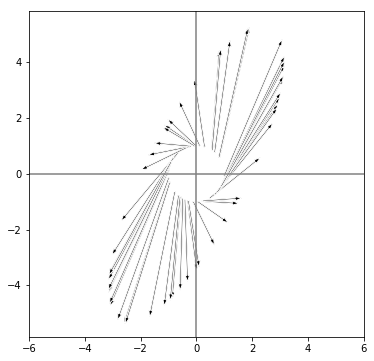

In [37]:
# Here is the matrix from above:
Z = matrix(vector(3, 5), vector(-1, 2))

# Or, uncomment this statement to try a random matrix:
#Z = matrix(random_vector(v_min=-5, v_max=5), random_vector(v_min=-5, v_max=5))

# Or, uncomment this statement to try a random diagonal matrix
#Z = [[1.5, 0.0], [0.0, 3.0]]

display_math('Z = ' + latex_matrix(Z))

figure(figsize=(6, 6))
new_blank_plot(xlim=(-6, 6), ylim=(-6, 6))
for _ in range(50):
    vk = normalize_vector(random_vector())
    wk = matvec(Z, vk)
    dk = sub(wk, vk)
    draw_vector2d(dk, origin=vk, width=0.05)

## Matrix-matrix products

This part of the notebook illustrates what is arguably the most important primitive operation in linear algebra, the _matrix-matrix product_. Let's get there by an example.

**Example: Combined rotations.**  Recall the linear transformation corresponding to rotation,

$$\mathrm{rotate}_{\theta}(v) \equiv \vectwo{v_0 \cos \theta - v_1 \sin \theta}{v_0 \sin \theta + v_1 \cos \theta}.$$

It can be written as a matrix-vector product,

$$\mathrm{rotate}_\theta(v)
  = \underbrace{\left[\begin{matrix} \cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{matrix}\right]}_{\equiv R(\theta)} \vectwo{v_0}{v_1}.$$
  
Here, we've given the name of the matrix of coefficients $R(\theta)$.

Now, suppose you rotate a vector first by $\theta$ and then by a different angle $\phi$. Applying these rotations "inside-out," that is, first by $\theta$ and then by $\phi$ results in the following sequence of products:

$$\begin{eqnarray}
  \mathrm{rotate}_{\phi}(\mathrm{rotate}_{\theta}(v))
  & = & R(\phi) \cdot (R(\theta) \cdot v) \\
  & = & R(\phi) \cdot \left( \left[\begin{matrix} \cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{matrix}\right] \vectwo{v_0}{v_1} \right) \\
  & = & R(\phi) \cdot \vectwo{v_0 \cos \theta - v_1 \sin \theta}{v_0 \sin \theta + v_1 \cos \theta} \\
  & = & \left[\begin{matrix} \cos\phi & -\sin\phi \\ \sin\phi & \cos\phi \end{matrix}\right]
         \cdot \vectwo{v_0 \cos \theta - v_1 \sin \theta}{v_0 \sin \theta + v_1 \cos \theta} \\
  & = & \vectwo{\cos\phi \cdot (v_0 \cos\theta - v_1 \sin\theta) - \sin\phi \cdot(v_0 \sin\theta + v_1 \cos\theta)}
               {\sin\phi \cdot (v_0 \cos\theta - v_1 \sin\theta) + \cos\phi \cdot(v_0 \sin\theta + v_1 \cos\theta)}.
\end{eqnarray}$$

Rearranging terms,

$$\begin{eqnarray}
\vectwo{(\cos\phi \cos\theta - \sin\phi \sin\theta) v_0 + (-\cos\phi \sin\theta  - \sin\phi \cos\theta)v_1}
       {(\sin\phi \cos\theta + \cos\phi \sin\theta) v_0  + (\cos\phi \cos\theta - \sin\phi \sin\theta) v_1}
& = & \left[\begin{matrix}
        \cos\phi \cos\theta - \sin\phi \sin\theta & -\cos\phi \sin\theta  - \sin\phi \cos\theta \\
        \sin\phi \cos\theta + \cos\phi \sin\theta &  \cos\phi \cos\theta - \sin\phi \sin\theta
      \end{matrix}\right]
      \vectwo{v_0}{v_1},
\end{eqnarray}$$

in other words, a matrix-vector product where the two rotation matrices, $R(\phi)$ and $R(\theta)$ have been combined.

Look carefully at this combined matrix. The first column looks like it could have been constructed from the matrix-vector product,

$$
  \vectwo{\cos\phi \cos\theta - \sin\phi \sin\theta}
         {\sin\phi \cos\theta + \cos\phi \sin\theta}
  =
  \left[\begin{matrix}
    \cos\phi & -\sin\phi \\
    \sin\phi &  \cos\phi
  \end{matrix}\right]
  \vectwo{\cos\theta}
         {\sin\theta},
$$

where the vector is just the first column of $R(\theta)$.

Similarly, the second column could have been constructed from

$$
  \vectwo{-\cos\phi \sin\theta - \sin\phi \cos\theta}
         {\cos\phi \cos\theta - \sin\phi \sin\theta}
  =
  \left[\begin{matrix}
    \cos\phi & -\sin\phi \\
    \sin\phi &  \cos\phi
  \end{matrix}\right]
  \vectwo{-\sin\theta}
         {\cos\theta},
$$

where the vector is just the second column of $R(\theta)$. In other words, the combination of $R(\phi)$ and $R(\theta)$ is obtained by a sequence of matrix-vector products, where $R(\phi)$ is multiplied by each column of $R(\theta)$ to get each corresponding column of their combination. These observations motivate the definition of a _matrix-matrix product_.

**Definition: matrix-matrix product,** or simply, _matrix product_ or _matrix multiply_. Let $A$ be an $m$-by-$k$ matrix and let $B$ be a $k$-by-$n$ matrix. View $B$ by its columns,

$$B = \left[\begin{matrix} b_0 & b_1 & \cdots & b_{n-1} \end{matrix}\right].$$

Then the _matrix-matrix product_, $A B$ (also denoted as $A \cdot B$) is defined as

$$A B \equiv A \left[\begin{matrix} b_0 & b_1 & \cdots & b_{n-1} \end{matrix}\right]
           = \left[\begin{matrix} A b_0 & A b_1 & \cdots & A b_{n-1} \end{matrix}\right].$$
           
Note that a matrix-vector product is just the special case in which $n=1$, i.e., $B$ has just one column.

**Exercise.** Implement a Python function, `matmat(A, B)`, that performs a matrix-matrix product according to the preceding definition.

In [38]:
def matmat(A, B):
    m, k_A = num_rows(A), num_cols(A)
    k_B, n = num_rows(B), num_cols(B)
    assert k_A == k_B, "Inner-dimensions of `A` and `B` do not match."
    
    C_cols = []
    for bi in B:
        C_cols.append(matvec(A, bi))
    C = matrix(*C_cols)
    return C

In [39]:
A = matrix(vector(1, 2, 3), vector(4, 5, 6), vector(7, 8, 9))
B = matrix(vector(-1, -1, -1), vector(1, 1, 1), vector(0.5, 0.25, 0.125))
C = matmat(A, B)

A_latex = latex_matrix(A)
B_latex = latex_matrix(B)
C_latex = latex_matrix(C)
display_math(r'{} \cdot {} = {}'.format(A_latex, B_latex, C_latex))

$\left[\begin{matrix}1 & 4 & 7 \\2 & 5 & 8 \\3 & 6 & 9 \end{matrix}\right] \cdot \left[\begin{matrix}-1 & 1 & 0.5 \\-1 & 1 & 0.25 \\-1 & 1 & 0.125 \end{matrix}\right] = \left[\begin{matrix}-12 & 12 & 2.375 \\-15 & 15 & 3.25 \\-18 & 18 & 4.125 \end{matrix}\right]$

**Exercise.** Let $C = AB$, where $A \in \mathbb{R}^{m \times k}$ and $B \in \mathbb{R}^{k \times n}$, so that $C \in \mathbb{R}^{m \times n}$. Show that every output element, $c_{i,j}$, may be computed by the scalar formula,

$$c_{i,j} = \sum_{s=0}^{k-1} a_{i,s} \cdot b_{s,j},$$

that is, as the dot product between row $i$ of $A$ and column $j$ of $B$. If you learned how to multiply matrices in high school or an introductory college class, you most likely learned this formula. We will sometimes refer to this way of computing a matrix multiply as the _dot product method_.

**Exercise.** Let $C = AB^T$, where $A \in \mathbb{R}^{m \times k}$ and $B \in \mathbb{R}^{n \times k}$, so that $B^T \in \mathbb{R}^{k \times n}$ and $C \in \mathbb{R}^{m \times n}$. Show that,

$$C = \sum_{s=0}^{k-1} a_s \cdot b_s^T,$$

where $a_s$ and $b_s$ denote the $s$-th columns of $A$ and $B$, respectively.

> **Important note!** The previous two exercises are two important facts about matrix products, namely, that there are different ways to think about how to compute it. We will frequently go back-and-forth between different methods, so it is best if you convince yourself that these formulas are right (_or find the bugs in them if they are not right_) and memorize the (_correct_) relations.

**Fin!** This is the end of this notebook. At this point, you should read the Da Kuang's notes on linear algebra (see link on edX under "Topic 3.")